In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Intervalo de confiança

1. **Seleção da Amostra Aleatória**:
   - `amostra = np.random.choice(populacao, tamanho_amostra)`
   - Uma amostra aleatória é essencial para garantir que cada membro da população tenha igual chance de ser selecionado. Isso ajuda a evitar viés na amostra e assegura que a amostra seja representativa da população inteira.

2. **Cálculo da Média Amostral**:
   - `media_amostral = np.mean(amostra)`
   - A média amostral ($\bar{x}$) é o estimador da média populacional ($\mu$). Ela é calculada como a soma de todos os valores na amostra dividida pelo número de observações na amostra.

3. **Cálculo do Erro Padrão da Média**:
   - `erro_padrao = sigma / np.sqrt(tamanho_amostra)`
   - O erro padrão da média (SE) mede a variabilidade ou dispersão das médias amostrais em torno da média populacional. Ele é calculado dividindo o desvio padrão da população ($\sigma$) pela raiz quadrada do tamanho da amostra ($n$), refletindo quanto as médias amostrais se distribuem em torno da verdadeira média populacional.

4. **Determinação do Valor Crítico (Z-Score)**:
   - `z = norm.ppf((1 + confianca) / 2)`
   - O valor crítico $z$ para um determinado nível de confiança é encontrado usando a função percent point function (ppf), que retorna o valor de z que corresponde ao quantil desejado da distribuição normal padrão. Para um IC de 95%, $z$ é aproximadamente 1.96.

5. **Cálculo da Margem de Erro**:
   - `margem_erro = z * erro_padrao`
   - A margem de erro determina quão longe a média amostral pode estar da média populacional. É o produto do valor crítico $z$ e o erro padrão da média.

6. **Cálculo do Intervalo de Confiança**:
   - `intervalo = (media_amostral - margem_erro, media_amostral + margem_erro)`
   - O intervalo de confiança é uma estimativa do intervalo dentro do qual a média populacional verdadeira provavelmente se encontra, com um determinado nível de confiança.

In [67]:
# Configuração da população
mu = 50  # Média da população, centro da distribuição normal.
sigma = 10  # Desvio padrão da população, mede a dispersão da distribuição.

# Geração de uma população normal
populacao = np.random.normal(mu, sigma, 100000)

def calcular_intervalo_confianca(tamanho_amostra, confianca=0.95):
    # Selecionar amostra aleatória da população
    amostra = np.random.choice(populacao, tamanho_amostra)
    # Calcular a média da amostra
    media_amostral = np.mean(amostra)
    # Calcular o erro padrão da média (SE = sigma/sqrt(n))
    erro_padrao = sigma / np.sqrt(tamanho_amostra)
    # Determinar o z-score para o nível de confiança desejado
    # O valor crítico z para a confiança desejada; z-score para um IC de 95% é tipicamente 1.96 (para dois lados)
    z = norm.ppf((1 + confianca) / 2)
    # Calcular a margem de erro
    margem_erro = z * erro_padrao
    # Calcular o intervalo de confiança
    intervalo = (media_amostral - margem_erro, media_amostral + margem_erro)
    return media_amostral, intervalo, erro_padrao, amostra, margem_erro

Tamanho da amostra: 1, Erro Padrão: 10.0000, Intervalo de Confiança: (47.26834178010849, 86.46762147090956), Média Amostral: 66.86798162550903
Tamanho da amostra: 2, Erro Padrão: 7.0711, Intervalo de Confiança: (29.304200125260103, 57.022276612253656), Média Amostral: 43.16323836875688
Tamanho da amostra: 5, Erro Padrão: 4.4721, Intervalo de Confiança: (46.74968441585302, 64.28013522738465), Média Amostral: 55.514909821618836
Tamanho da amostra: 10, Erro Padrão: 3.1623, Intervalo de Confiança: (43.34740218910265, 55.74330283519389), Média Amostral: 49.54535251214827
Tamanho da amostra: 30, Erro Padrão: 1.8257, Intervalo de Confiança: (44.1773547202468, 51.33413129511543), Média Amostral: 47.75574300768111
Tamanho da amostra: 50, Erro Padrão: 1.4142, Intervalo de Confiança: (47.89699757496792, 53.440612872366636), Média Amostral: 50.66880522366728
Tamanho da amostra: 100, Erro Padrão: 1.0000, Intervalo de Confiança: (46.71142531738049, 50.631353286460595), Média Amostral: 48.67138930192

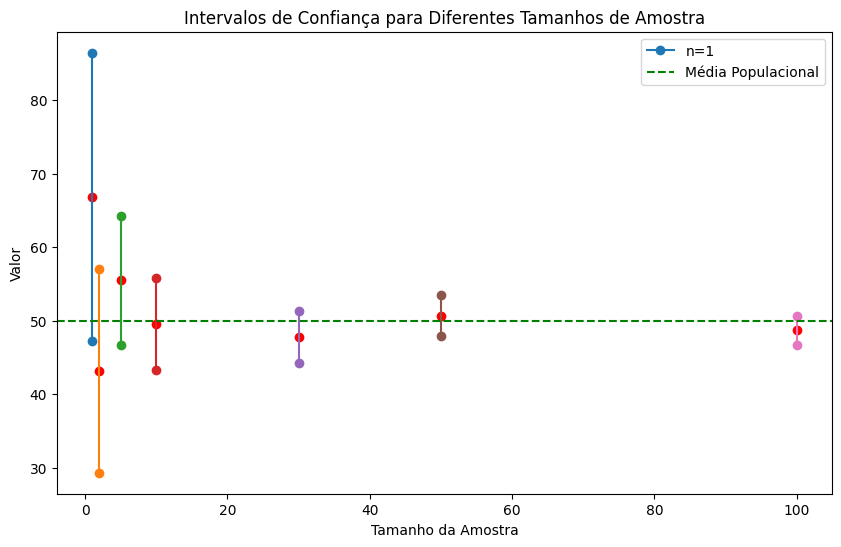

In [68]:
# Tamanhos de amostra para testar
tamanhos = [1, 2, 5, 10, 30, 50, 100]
medias = []
intervalos = []
amostras = []
margens_erros = []

# Calcular intervalos de confiança para cada tamanho de amostra
for tamanho in tamanhos:
    media, intervalo, erro_padrao, amostra, margem_erro = calcular_intervalo_confianca(tamanho, 0.95)
    medias.append(media)
    intervalos.append(intervalo)
    amostras.append(amostra)
    margens_erros.append(margem_erro)
    print(f"Tamanho da amostra: {tamanho}, Erro Padrão: {erro_padrao:.4f}, Intervalo de Confiança: {intervalo}, Média Amostral: {media}")

# Preparar o gráfico
plt.figure(figsize=(10, 6))
for i, tamanho in enumerate(tamanhos):
    # Plotar intervalos de confiança
    plt.plot([tamanho, tamanho], [intervalos[i][0], intervalos[i][1]], marker='o', label=f'n={tamanho}' if i == 0 else "")
    plt.scatter(tamanho, medias[i], color='red')  # Marcar a média amostral
# Adicionar detalhes ao gráfico
plt.axhline(y=mu, color='green', linestyle='--', label='Média Populacional')
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Valor')
plt.title('Intervalos de Confiança para Diferentes Tamanhos de Amostra')
plt.legend()
plt.show()


Observando que para $ n = 1 $, o intervalo de confiança fica bastante amplo e pode não incluir a média populacional (marcada pela linha verde tracejada), podemos tirar várias conclusões importantes sobre a natureza de intervalos de confiança e amostragem:

**Variabilidade Alta com Amostras Pequenas**: Com uma amostra de tamanho 1, a estimativa da média é baseada em apenas uma observação. Isso resulta em uma variabilidade muito alta, pois a única observação pode ser atípica (muito alta ou muito baixa em relação à média populacional). Como resultado, o intervalo de confiança é largo, tentando capturar a incerteza associada a uma estimativa tão volátil.

**Erro Padrão Grande**: Para $ n = 1 $, o erro padrão é igual ao desvio padrão da população, que é o maior possível neste contexto. Isso resulta em uma margem de erro grande, estendendo o intervalo de confiança para um alcance amplo que ainda pode não capturar a média populacional se a única observação for um outlier.

**Significado do Intervalo de Confiança**: O fato de o intervalo de confiança não cobrir a média populacional não invalida a metodologia; em vez disso, reflete a realidade de que com um nível de confiança de 95%, esperamos que aproximadamente 5% dos intervalos de confiança calculados não contenham a média populacional. Quando o tamanho da amostra é 1, a probabilidade de selecionar um outlier é relativamente alta, e isso pode levar a intervalos de confiança que não refletem a média da população.

**Importância do Tamanho da Amostra**: À medida que o tamanho da amostra aumenta, o erro padrão diminui, o que reduz a margem de erro e, consequentemente, estreita o intervalo de confiança. Isso aumenta a probabilidade de que o intervalo de confiança inclua a média populacional, como demonstrado nos resultados para tamanhos de amostra maiores no gráfico.

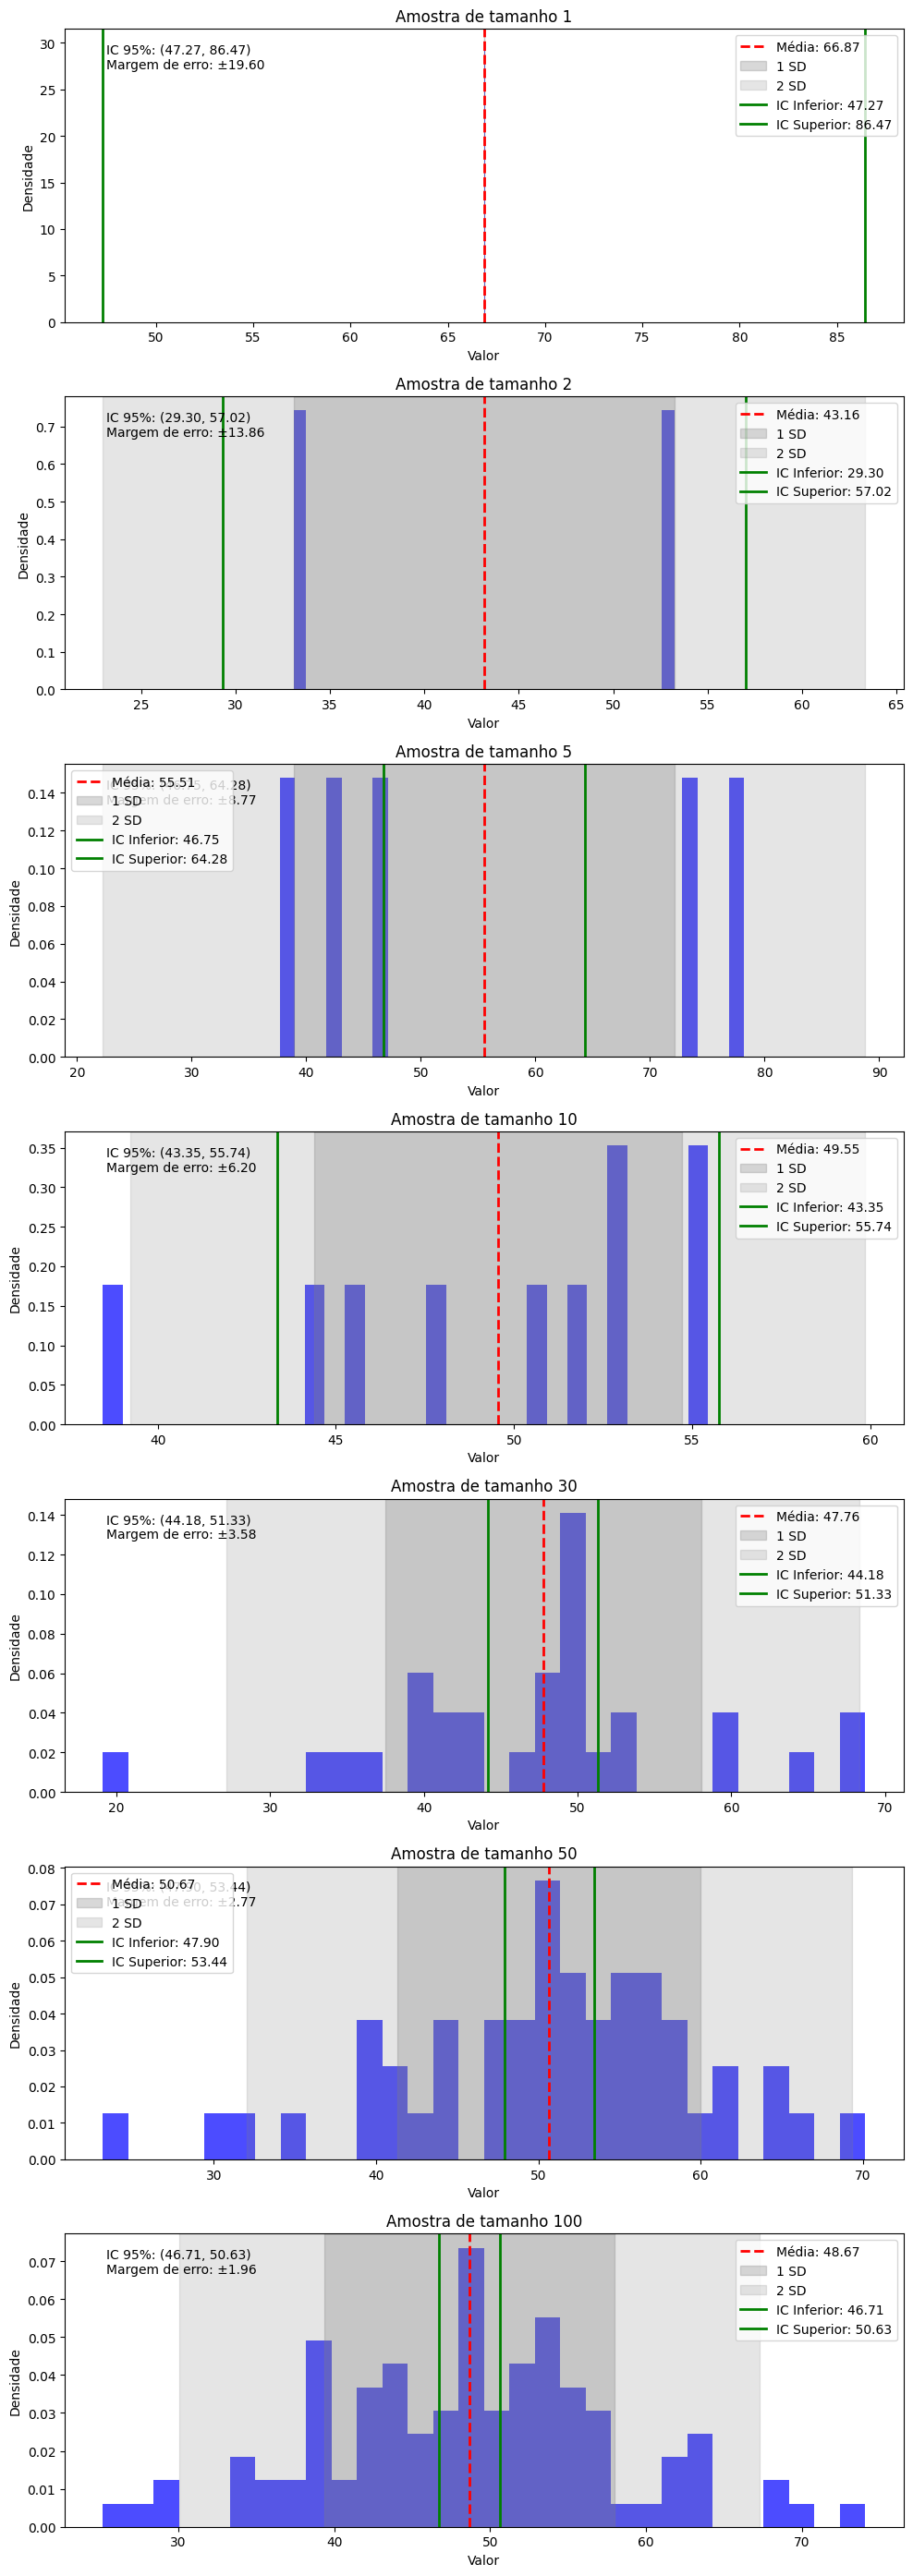

In [69]:
# Configurações do gráfico
fig, axes = plt.subplots(nrows=len(tamanhos), ncols=1, figsize=(10, 4 * len(tamanhos)))

# Plotar um histograma para cada tamanho de amostra
for i, tamanho in enumerate(tamanhos):
    amostra = amostras[i]
    media_amostral = medias[i]
    intervalo = intervalos[i]
    desvio_padrao_amostral = np.std(amostra)
    margem_erro = margens_erros[i]

    # Histograma
    axes[i].hist(amostra, bins=30, color='blue', alpha=0.7, density=True)
    axes[i].axvline(media_amostral, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_amostral:.2f}')
    axes[i].axvspan(media_amostral - desvio_padrao_amostral, media_amostral + desvio_padrao_amostral, alpha=0.3, color='gray', label='1 SD')
    axes[i].axvspan(media_amostral - 2 * desvio_padrao_amostral, media_amostral + 2 * desvio_padrao_amostral, alpha=0.2, color='gray', label='2 SD')
    axes[i].axvline(intervalo[0], color='green', linestyle='solid', linewidth=2, label=f'IC Inferior: {intervalo[0]:.2f}')
    axes[i].axvline(intervalo[1], color='green', linestyle='solid', linewidth=2, label=f'IC Superior: {intervalo[1]:.2f}')

    # Adicionar informações sobre o intervalo de confiança e margem de erro
    axes[i].text(0.05, 0.95, f'IC 95%: ({intervalo[0]:.2f}, {intervalo[1]:.2f})', transform=axes[i].transAxes, verticalalignment='top')
    axes[i].text(0.05, 0.90, f'Margem de erro: ±{margem_erro:.2f}', transform=axes[i].transAxes, verticalalignment='top')

    axes[i].set_title(f'Amostra de tamanho {tamanho}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Densidade')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Visualização nos Gráficos

Nos gráficos fornecidos, observamos as seguintes tendências à medida que o tamanho da amostra aumenta:

1. **Amostra de tamanho 1**:
   - A média amostral pode ser muito diferente da média populacional devido à alta variabilidade.
   - O intervalo de confiança é largo, refletindo a alta incerteza na estimativa da média.

2. **Amostra de tamanho 2 e 5**:
   - As médias amostrais começam a se aproximar da média populacional.
   - A margem de erro e o intervalo de confiança ainda são relativamente grandes, mas diminuem em comparação com a amostra de tamanho 1.

3. **Amostra de tamanho 10**:
   - A média amostral é uma estimativa mais precisa da média populacional.
   - A margem de erro e o intervalo de confiança são menores, indicando uma estimativa mais precisa.

4. **Amostra de tamanho 30, 50 e 100**:
   - As médias amostrais estão muito próximas da média populacional.
   - A margem de erro é pequena, resultando em intervalos de confiança estreitos.
   - A precisão na estimativa da média é alta.

### Conclusão

À medida que o tamanho da amostra aumenta:
- **A média amostral** se torna uma estimativa mais precisa da média populacional.
- **O desvio padrão amostral** se aproxima do desvio padrão populacional.
- **O erro padrão da média** diminui, levando a margens de erro menores.
- **Os intervalos de confiança** se estreitam, refletindo maior precisão na estimativa da média.

Essas tendências demonstram a importância de aumentar o tamanho da amostra para obter estimativas mais precisas e confiáveis em estatísticas inferenciais.

### Importância da Amostra Aleatória

A aleatoriedade na seleção da amostra é fundamental para a inferência estatística porque garante que a amostra não seja enviesada. Sem a aleatoriedade, a estimativa pode ser sistematicamente inclinada para um particular subconjunto da população, resultando em inferências imprecisas ou incorretas sobre a população.

### Por Que Tamanho da Amostra Maior que 30?

O tamanho da amostra maior que 30 é necessário devido ao Teorema Central do Limite (TCL), que afirma que a distribuição das médias amostrais de qualquer distribuição com um número suficiente de observações (geralmente n > 30) se aproxima de uma distribuição normal. Isso permite a aplicação de métodos estatísticos baseados na normalidade, como o cálculo de intervalos de confiança usando o valor crítico z, mesmo que a distribuição original da população não seja normal.

Esse tamanho de amostra assegura que o erro padrão seja suficientemente pequeno para que o intervalo de confiança seja útil e que as propriedades estatísticas, como a média e o desvio padrão da amostra, sejam boas estimativas de seus verdadeiros valores populacionais.